
# Lecture 6:  NumPy array methods

how the heck do we pronounce it.    pi or pie?

## Today: 2/10


1. Creating numpy arrays
2. numpy array attributes, array shapes.
3. Indexing and slicing
5. Re-shaping an array
7. Vectorized math
8. Dot products and cross products of vectors

## The `ndarray`

The core numpy object is the `ndarray`. 
* multidimensional table of elements
* indexed by tuple of integers

The `dtype` argument can give you explicit control over typing -- otherwise numpy infers.

In [5]:
import numpy as np 
a = np.array((100, 101, 102)) #tuple of values  
# a = np.array([100, 101, 102]) #list of values 
# a = np.array([100, 101, 102], dtype=complex) #with dtype
print(type(a))
print(a)

<class 'numpy.ndarray'>
[100 101 102]


Can also be higher dimensional!

In [6]:
b = np.array([[1,2,3,4],[5,6,7,8]])
print(b)

[[1 2 3 4]
 [5 6 7 8]]


A numpy array knows its own:
* shape (`shape`): the values of N x M
* rank (`ndim`): how many dimensions it has
* size (`size`): total number of elements
* dtype (`dtype`): what it's composed of

In [7]:
print(f"Shape is {b.shape}") 
print(f"Rank is {b.ndim}") 
print(f"Size is {b.size}") 
print(f"Type is {b.dtype}") 

Shape is (2, 4)
Rank is 2
Size is 8
Type is int64


Ways to initialize numpy arrays

In [8]:
#manually
a = np.array([1,2]) 
#get you back the step size
x, dx = np.linspace(0, 2*np.pi, 100, retstep = True) #via linspace or arange, confused
print(dx)

mty = np.empty((5,2))
print(mty)

zrs = np.zeros(4)
print(zrs)

ons = np.ones(4) 
print(ons)

flo = np.full(4, fill_value = 3)
print(flo)

#how to get all zeroes

0.06346651825433926
[[nan  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[0. 0. 0. 0.]
[1. 1. 1. 1.]
[3 3 3 3]


### `nan` and `inf`

Python, and numpy, have ways to store things that are:
* "infinite" (`inf`)
* "Not A Number" (`nan`)

In [9]:
c = np.linspace(4, 10, 4)
print(c)
c /=0 # an undefined operation
print(c)

[ 4.  6.  8. 10.]
[inf inf inf inf]


C:\Users\Sspir\AppData\Local\Temp\ipykernel_18644\30422706.py:3: RuntimeWarning: divide by zero encountered in divide
  c /=0 # an undefined operation


Detect nans by asking numpy. **Do Not** check equality on nans and inf with `==`. The definition of a Nan is **not a number**. Comparisons with them are not well posed questions.

In [10]:
is_nan = np.isnan(c)
print(f"Is NaN {is_nan}")
is_finite = np.isnan(c) 
print(f"Is finite {is_finite}")
is_inf = np.isinf(c) 
print(f"Is infinite {is_inf}")

Is NaN [False False False False]
Is finite [False False False False]
Is infinite [ True  True  True  True]


## Accessing Elements, Slicing

Access elements via a tuple of integers, in "row, column" format

In [11]:
b = np.array([[1,2,3,4],[5,6,7,8]])
print(b[0,1])

2


Can "slice" over an array, just like in normal python tuples.

Format of [stard:end:step].

Slices over numpy arrays return **views**. It does not "own" the data. Attempts to change the view will not yield changes to the base object.

In [12]:
a = np.linspace(1, 10, 10)
print(a)
my_view = a[1:4:2] # start at element 1, end at element 4, stride of size 2
print(my_view) 

my_backwards_view = a[7::-2] # start at element 7, end at the beginning, stride of size 2 reverse
print(my_backwards_view)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[2. 4.]
[8. 6. 4. 2.]


Multi-dimensional arrays have indices for each axis. If you want every item along an axis, use a colon

In [13]:
b = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(b)
print('----')
print(b[:,1]) #grab all rows and the 1-th column
print('----')
print(b[1,:]) #grab all column and the 1-th row

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
----
[ 2  6 10]
----
[5 6 7 8]


## Controlling Array Size and Shape

### `flatten` and `ravel`

Multidimensional arrays can be **flattened**.

`flatten`: returns a **independent copy** (something to which you can make changes)
`ravel`: returns a **view** (something that simply references the original)

In [14]:
b = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
b_flat = b.flatten()
b_ravel = b.ravel() 

print(f"This is b \n{b}")
print(f"This is flattened b {b_flat}") 
print(f"This is raveled b {b_ravel}") 
print("----")

b_flat[0] = -1
print(f"After changing flattened copy: b_flat = {b_flat}") 
print(f"After changing flattened copy: b = \n{b}") #confused, why didn't it go to -1
print("----") 

b_ravel[0] = -2
print(f"After changing raveled copy: b_flat = {b_ravel}")
print(f"After changing raveled copy: b = \n{b}")

This is b 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
This is flattened b [ 1  2  3  4  5  6  7  8  9 10 11 12]
This is raveled b [ 1  2  3  4  5  6  7  8  9 10 11 12]
----
After changing flattened copy: b_flat = [-1  2  3  4  5  6  7  8  9 10 11 12]
After changing flattened copy: b = 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
----
After changing raveled copy: b_flat = [-2  2  3  4  5  6  7  8  9 10 11 12]
After changing raveled copy: b = 
[[-2  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### `resize` and `reshape`

You can also morph the shape of an array.

`resize`: alter the size **inplace* (the object itself will change)

`reshape`: returns a **view** on the array

In [15]:
#example of resize
a = np.linspace(1,4,4)
print(a)
a.resize(2,2) # cast to a 2x2 matrix
print(a)

[1. 2. 3. 4.]
[[1. 2.]
 [3. 4.]]


In [16]:
#example of reshape
a = np.linspace(1,4,4)
b = a.reshape(2,2)
print(a)
print(b)
print('----')
b[0,0] = -99
print(a)

[1. 2. 3. 4.]
[[1. 2.]
 [3. 4.]]
----
[-99.   2.   3.   4.]


### Transposition

Arrays can be *transposed*. When possible, the `transpose` functions returns a **view**.

In [20]:
a = np.linspace(1,6,6)
print("The original array")
print('----')
print(a)

a_view = a.reshape(3,2)
print("The view in 3x2 matrix")
print('----')
print(b)

a_view_stranspose = a_view.transpose()
print("The transposition of the view")
print('----')
print(c)

a_view_stranspose[0,0] = -99
print("See how a was changed!")
print('----')
print(a)

The original array
----
[1. 2. 3. 4. 5. 6.]
The view in 3x2 matrix
----
[[-99.   2.]
 [  3.   4.]]
The transposition of the view
----
[inf inf inf inf]
See how a was changed!
----
[-99.   2.   3.   4.   5.   6.]


## Vectorization and Broadcasting

### Vectorization
Already discussed *vectorization* the ability for numpy to apply operations on all elements of an array. For example, multiplication:

In [21]:
#multiplication
a = np.array([2,3])
print(a)
b = np.array([1,2])
print(b)
print(a*b) #this gives me elemnent-wse multipication

[2 3]
[1 2]
[2 6]


Or comparisons

In [22]:
a = np.array([-2, -1, 0, 1, 2])

is_less_zero = a < 0 #detect location of negative elements
print(is_less_zero)

#can *mask* the array
print(a[is_less_zero]) #only prints elements smaller than zero

#set all elements
a[is_less_zero] = 0
print(a)

# or can do it super fast "in place"
a = np.array([-2, -1, 0, 1, 2])
a[a<0] = 0
print(a)


[ True  True False False False]
[-2 -1]
[0 0 0 1 2]
[0 0 0 1 2]


You can *vectorize* a custom function. More on this later.

### Broadcasting

*Broadcasting* is what numpy does when two arrays have different shapes.

In [24]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape) #a 2x3
print('----')

b = np.array([10,20,30])
print(b)
print(b.shape) #a 1x3
print('----')

c = a*b #multiplication works, every row of a gets multiplied by b
print(c)

[[1 2 3]
 [4 5 6]]
(2, 3)
----
[10 20 30]
(3,)
----
[[ 10  40  90]
 [ 40 100 180]]


## Doing Math with numpy arrays

The power to broadcast enables numpy to support a wide range of matrix algebra routines, including...
* Dot, Inner, Outer, and Cross products
* Matrix multiplication 

In [26]:
#dot product
a = np.array([1,0,-3])
print(a)
b = np.array([2,-2,5])
print(b)

dot_product = np.dot(a,b) #a@b or a.dot(b)
cross_product = np.cross(a,b)
print(f"Dot Product: {dot_product}")
print(f"Cross Product: {cross_product}")

[ 1  0 -3]
[ 2 -2  5]
Dot Product: -13
Cross Product: [ -6 -11  -2]


In [27]:
a = np.linspace(1,10,9).reshape(3,3)
b = np.linspace(20,30,9).reshape(3,3)
c = np.matmul(a,b)
print(c)

[[159.84375 167.8125  175.78125]
 [400.3125  420.9375  441.5625 ]
 [640.78125 674.0625  707.34375]]


NB: For arrays of dimension 2 or lower, matmul and dot will have identical outcomes.
The broadcasting behavior is different for rank 3 or higher.

## Tolerance

Computers store numbers as bytes. Bytes are fundamentally limited. So numbers that are formally irrational (pi, e, 1/3, etc.) must be stored in *truncated* form. This makes comparisons difficult and unweildy.

Instead, in numerical work, we refer to **absolute** ($T_{abs}$) and **relative** ($T_{rel}$) tolerances.

Two numbers `a` and `b` are considered the same if 

$$
|a-b| <= T_{abs} + T_{rel} * |b|
$$

where $T_{abs} = 10^{-8}$ and $T_{rel} = 10^{-5}$ by default.

Can check by using `np.isclose`, and use it to avoid singularities.

In [28]:
a = 1E-9
is_close_to_zero = np.isclose(a,0) #is within1E-8 of zero, so this will be true
print(is_close_to_zero)

True


## put it all together! (and practice plotting)

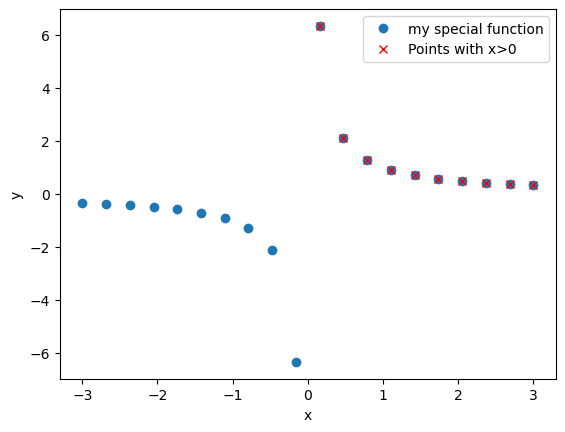

In [31]:
#let's define a functino
def myfunc(x):
    if np.isclose(x,0): #dodge the singularity
        return 0.0
    else:
        return 1/x

vfunc = np.vectorize(myfunc) #vectorize it

x = np.linspace(-3,3,20) #x-axis
y = vfunc(x)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y,"o", label="my special function")
ax.set_xlabel("x")
ax.set_ylabel("y")

is_gtr_zero = x>0
ax.plot(x[is_gtr_zero], y[is_gtr_zero],'rx', label="Points with x>0")
ax.legend()